In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
base_dir = os.path.dirname(os.path.abspath("..\data"))
path = os.path.join(base_dir, r"data")
os.chdir(path) 

In [7]:
df = pd.read_csv("Cleaned data\data.csv")
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'DATE', 'TOTALDEMAND',
       'HOLIDAY', 'MIN', 'MAX', 'RAIN', 'SOLAR', 'RRP', 'FORECASTDEMAND',
       'OUTPUT', 'MONTHDATE', 'WEEKDAY', 'WEEKEND', 'TEMPAVE'],
      dtype='object')

In [59]:
df_lim = df[df["YEAR"]==2020]

## Descriptive Statistics

In [91]:
df.describe()

,YEAR,MONTH,DAY,HUMIDITY,WINDSPEED,TOTALDEMAND,HOLIDAY,MIN,MAX,RAIN,SOLAR,RRP,FORECASTDEMAND,OUTPUT,WEEKDAY,WEEKEND,TEMPAVE
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.00000,1990.000000
mean,2018.412563,6.273367,15.773869,0.676574,20.429919,7938.569881,0.034673,12.714322,24.503668,2.854171,16.014322,91.168926,7888.567378,172.349920,3.000503,0.28593,18.582864
std,1.821370,3.436656,8.779640,0.139368,6.728314,782.190213,0.182997,5.755622,5.665890,10.695274,7.113749,90.664972,770.702974,151.391422,1.999623,0.45197,5.277815
min,2016.000000,1.000000,1.000000,0.000000,0.000000,6035.576076,0.000000,-1.400000,12.300000,0.000000,1.000000,23.908333,5518.989111,24.640000,0.000000,0.00000,0.000000
25%,2017.000000,3.000000,8.000000,0.593880,15.222917,7390.108099,0.000000,8.000000,20.000000,0.000000,10.800000,52.180573,7345.926781,72.780000,1.000000,0.00000,14.100000
50%,2018.000000,6.000000,16.000000,0.690231,19.328991,7846.320451,0.000000,13.100000,24.200000,0.000000,14.650000,75.003750,7816.133609,127.200000,3.000000,0.00000,18.750000
75%,2020.000000,9.000000,23.000000,0.777609,24.399517,8497.666267,0.000000,17.500000,28.000000,0.400000,21.400000,93.008333,8454.892596,221.030000,5.000000,1.00000,22.437500
max,2022.000000,12.000000,31.000000,0.965091,47.857143,10851.752604,1.000000,28.100000,47.000000,159.600000,32.200000,1539.430000,10751.957092,916.710000,6.000000,1.00000,34.400000


## Visuals

In [70]:
# set variables
Date = df_lim.DATE
Temp = df_lim.TEMPAVE
Demand = df_lim.TOTALDEMAND
Rain = df_lim.RAIN
Solar = df_lim.SOLAR
Output = df_lim.OUTPUT
RRP = df_lim.RRP
WindSpeed = df_lim.WINDSPEED
Humidity = df_lim.HUMIDITY
Holiday = df_lim.HOLIDAY
Weekday = df_lim.WEEKDAY
Weekend = df_lim.WEEKEND 

### Time Series Plots

#### Demand by Date

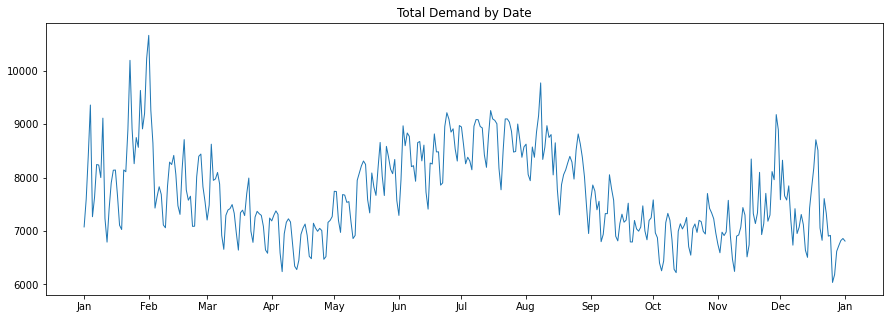

In [71]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Demand, linewidth=1)
ax.set_title("Total Demand by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show() 

#### Temperature by Date

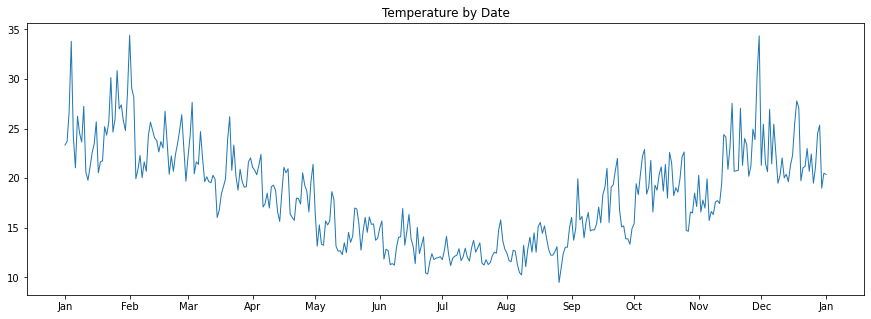

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Temp, linewidth=1)
ax.set_title("Temperature by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Rain by Date

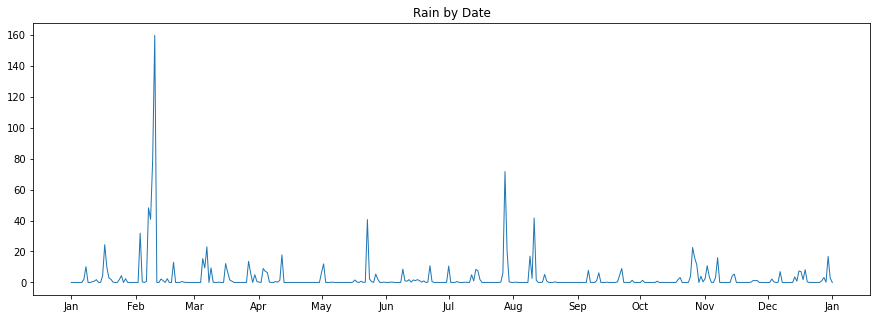

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Rain, linewidth=1)
ax.set_title("Rain by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Solar Exposure by Date

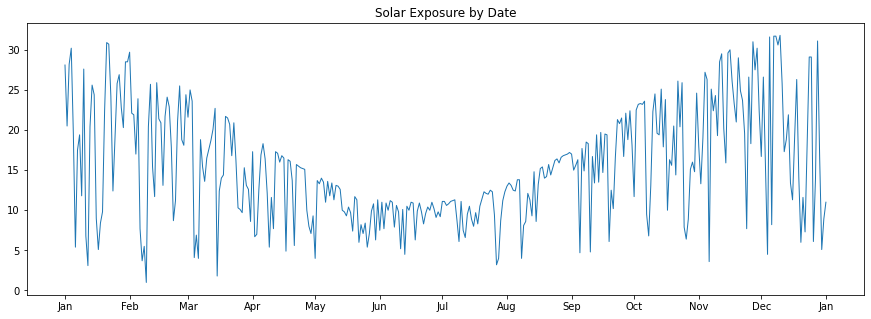

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Solar, linewidth=1)
ax.set_title("Solar Exposure by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Humidity by Date

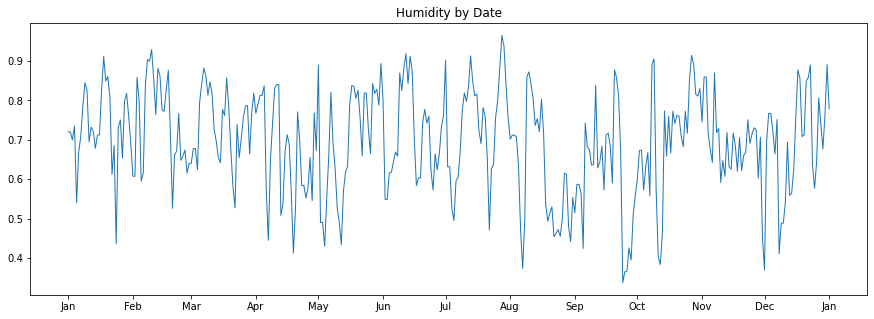

In [75]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Humidity, linewidth=1)
ax.set_title("Humidity by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Windspeed by Date

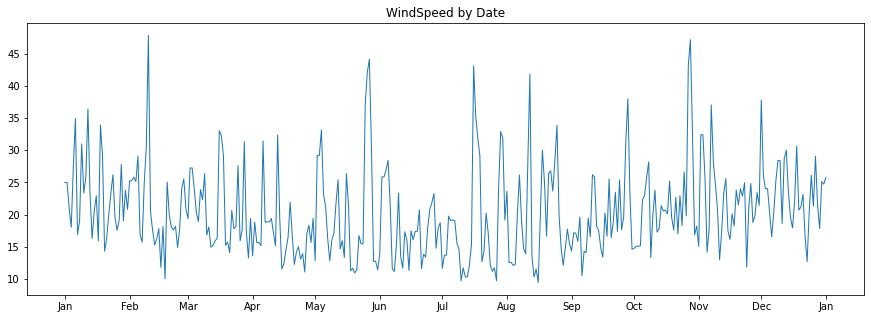

In [76]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, WindSpeed, linewidth=1)
ax.set_title("WindSpeed by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

### Correlation Analysis

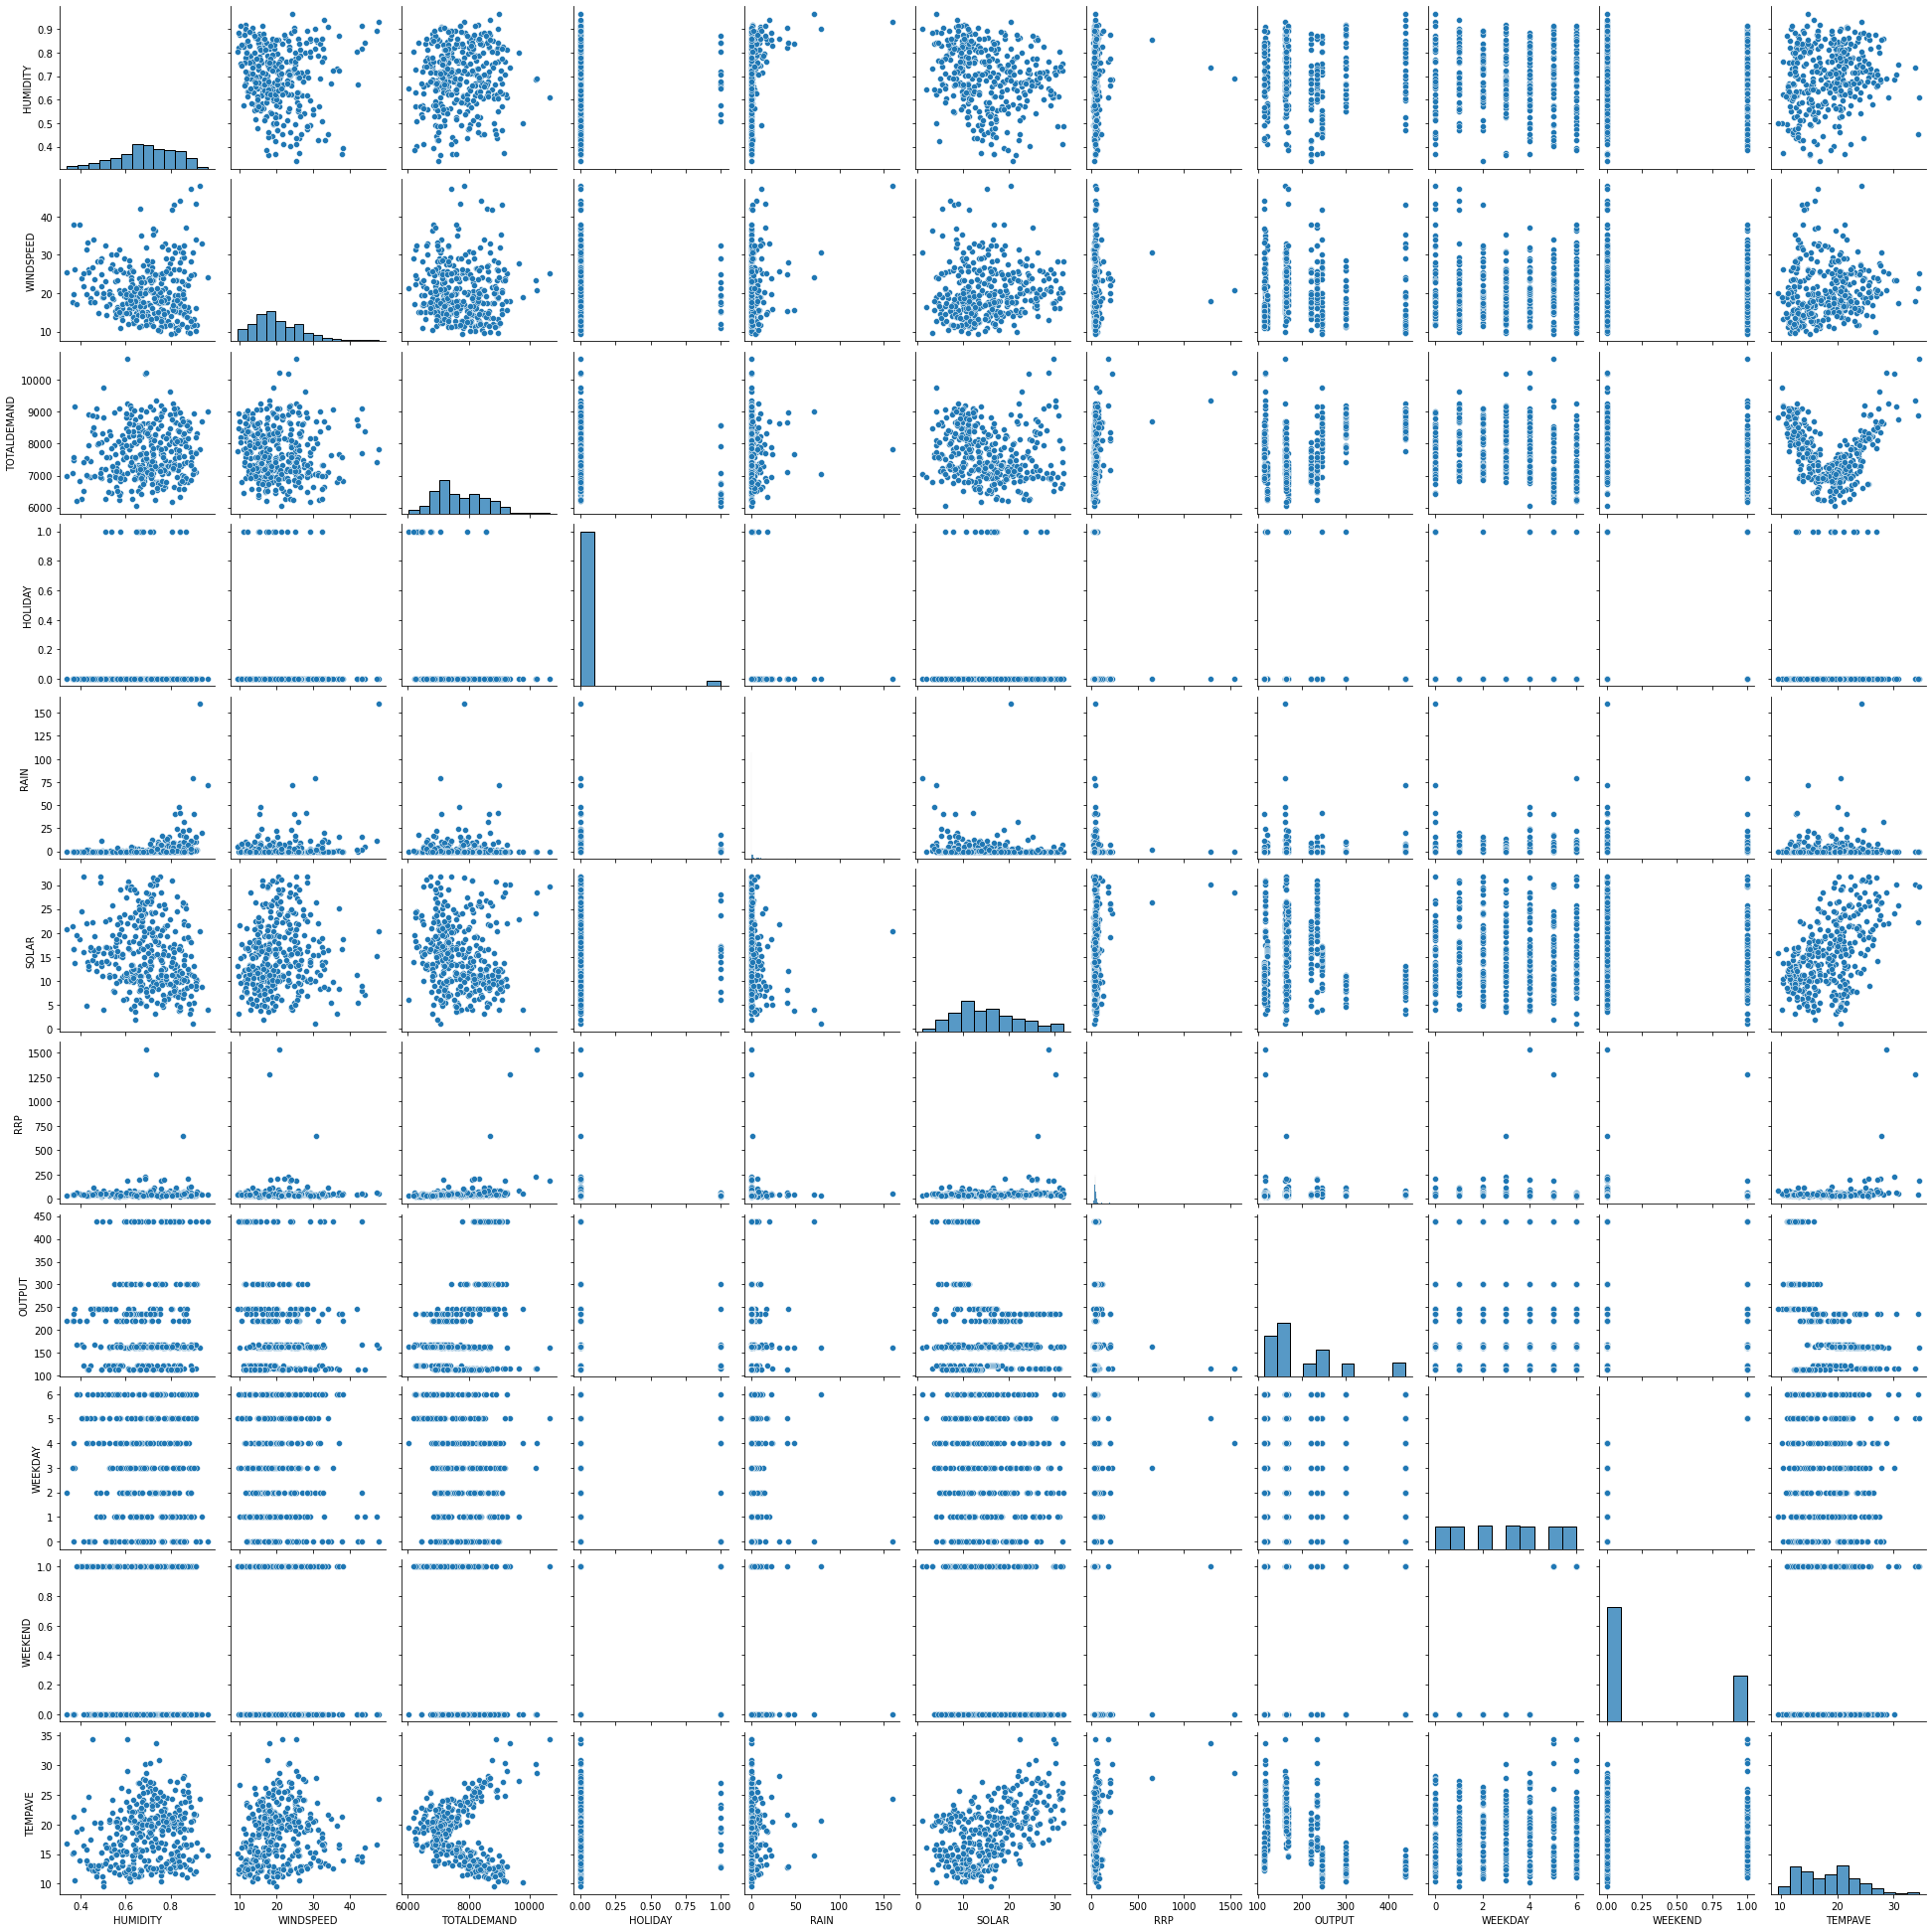

In [81]:
df_pp = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","HOLIDAY","RAIN","SOLAR","RRP","OUTPUT","WEEKDAY","WEEKEND","TEMPAVE"]]
sns.pairplot(df_pp) 

### Outlier Analysis

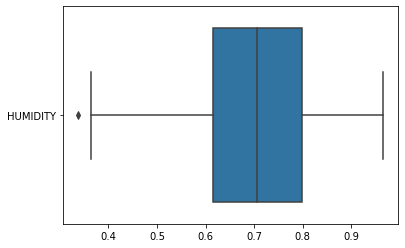

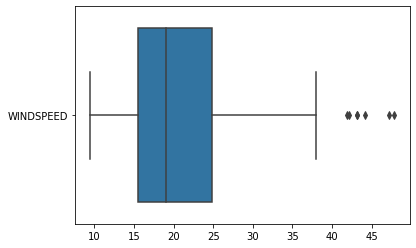

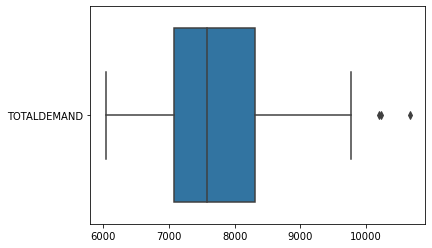

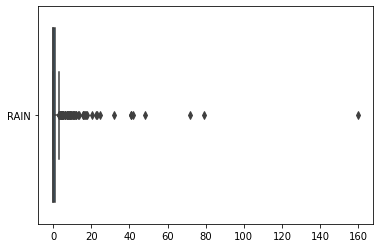

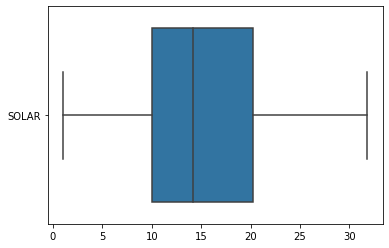

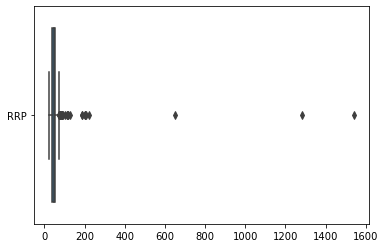

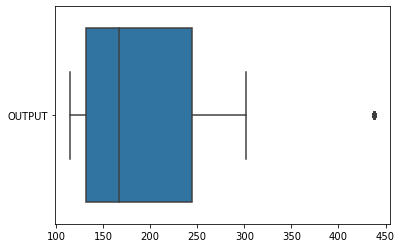

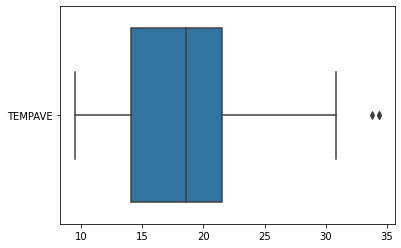

In [90]:
df_box = df_lim[["HUMIDITY","WINDSPEED","TOTALDEMAND","RAIN","SOLAR","RRP","OUTPUT","TEMPAVE"]]
for col in df_box.columns:
    sns.boxplot(data=df_box[[col]], orient="h")
    plt.show()